In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Train Model to Detect Mean Change
Set Threshold to 1.7 times of the maximum CUSUM of the first 50 observations -> To reduce falst alarm rate

In [144]:
# function to find CUSUM using mean from first 50 observations
def findCUSUM_nochange(data):
    cusums = []
    cusum = 0
    mean = np.mean(data)
    sd = np.std(data)

    for x in data:
        cusum = cusum + (x - mean)
        cusums.append(cusum)
        
    return cusums

# find CUSUM for each signal
# if CUSUM > max, change is detected
def findCUSUM_mightchange(data, no_change_cusums, mean):
    n = 50
    all_cusums = no_change_cusums[:]
    plt.plot(no_change_cusums)
    plt.title("CUSUM of first 50 observations")
    plt.show()
    
    cusum = no_change_cusums[-1]
    for x in data:
        n += 1
        cusum = cusum + (x - mean)
        all_cusums.append(cusum)
        if np.absolute(cusum) > np.max(np.absolute(no_change_cusums))*1.7:
            print("Detect Change at position " + str(n))
            print("CUSUM = " + str(cusum))
            plt.plot(all_cusums)
            plt.title("CUSUM of " + str(n) + " observations")
            plt.show()
            return
    print("No Change")
    plt.plot(all_cusums)
    plt.title("CUSUM of " + str(n) + " observations")
    plt.show()
    return

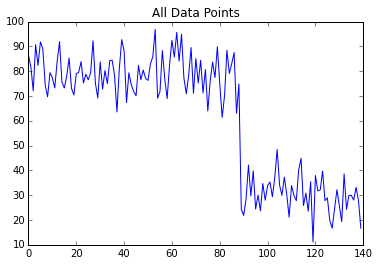

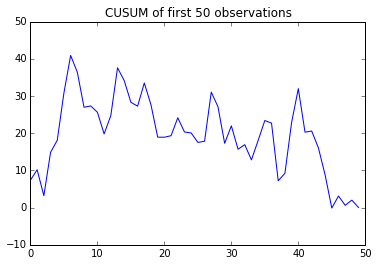

Detect Change at position 91
CUSUM = -85.88762


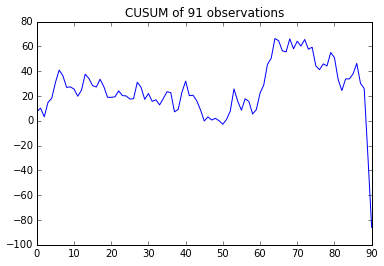

In [145]:
## Test with posShiftDownMean_90.txt
data = np.loadtxt("posShiftDownMean_90.txt", delimiter=",")
plt.plot(data)
plt.title("All Data Points")
plt.show()

# divide data into two parts and run functions
findCUSUM_mightchange(data[50:], findCUSUM_nochange(data[:50]), np.mean(data[:50]))

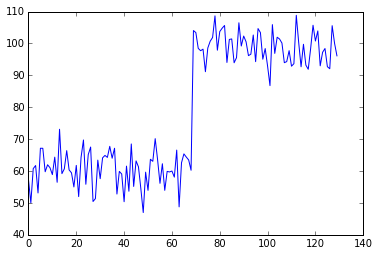

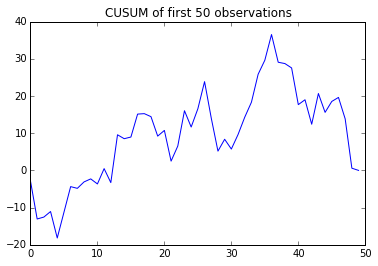

Detect Change at position 71
CUSUM = 98.30842


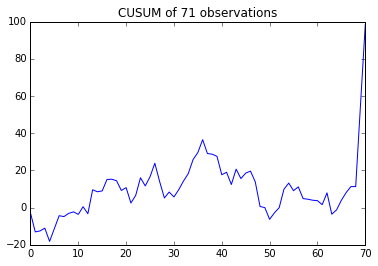

In [146]:
## Test with posShiftUpMean_70.txt
data = np.loadtxt("posShiftUpMean_70.txt", delimiter=",")
plt.plot(data)
plt.show()

# divide data into two parts and run functions
findCUSUM_mightchange(data[50:], findCUSUM_nochange(data[:50]), np.mean(data[:50]))

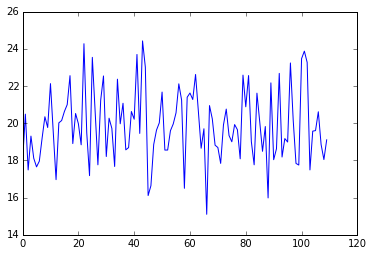

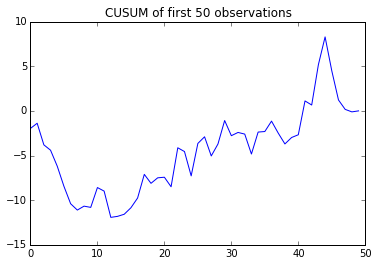

No Change


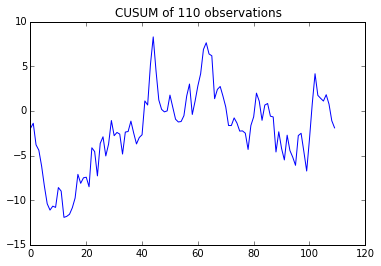

In [147]:
## Test with negFlata.txt
data = np.loadtxt("negFlata.txt", delimiter=",")
plt.plot(data)
plt.show()

# divide data into two parts and run functions
findCUSUM_mightchange(data[50:], findCUSUM_nochange(data[:50]), np.mean(data[:50]))

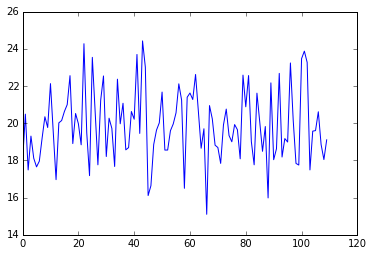

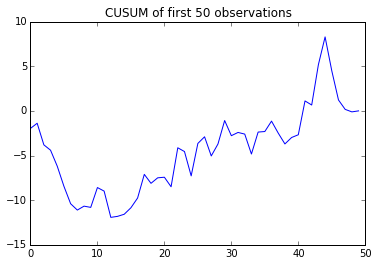

No Change


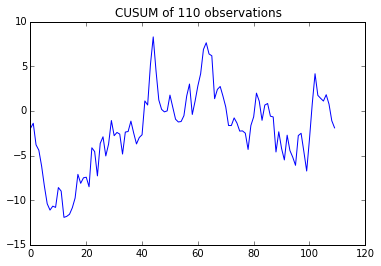

In [148]:
## Test with negFlatb.txt
data = np.loadtxt("negFlatb.txt", delimiter=",")
plt.plot(data)
plt.show()

# divide data into two parts and run functions
findCUSUM_mightchange(data[50:], findCUSUM_nochange(data[:50]), np.mean(data[:50]))

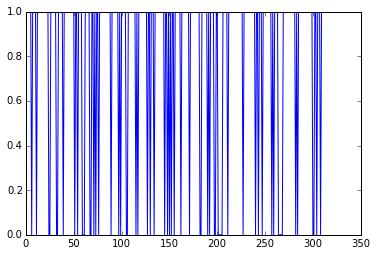

In [142]:
## Test with negBinary.txt
with open('negBinary.txt') as f:
    lines = f.read().splitlines()
f.close()

data = []
for x in lines:
    if x == 'a':
        data.append(0) 
    if x == 'b':
        data.append(1) 


plt.plot(data)
plt.show()

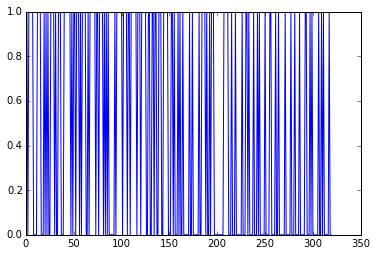

In [143]:
## Test with posBinary_150.txt
with open('posBinary_150.txt') as f:
    lines = f.read().splitlines()
f.close()

data = []
for x in lines:
    if x == 'a':
        data.append(0) 
    if x == 'b':
        data.append(1) 


plt.plot(data)
plt.show()